In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt



In [5]:

# read training and test data
diabetes_train = pd.read_csv("diabetes_train.csv")
diabetes_test = pd.read_csv("diabetes_test.csv")
print(diabetes_train.head())
print(diabetes_test.head())


# create x and y train 
x_train = diabetes_train.iloc[:, :7]
y_train = diabetes_train.iloc[:, 7]

# WRITE YOUR CODE HERE 

# tune the model

# specify the number of folds for k-fold CV
n_folds = 5

# specify range of parameters (C) as a list
params = {"C": [1,10,100,1000]}

# create SVC object
linear_model = SVC()

# set up grid search scheme
model_cv = GridSearchCV(estimator = linear_model, 
                        param_grid = params, 
                        scoring= 'accuracy', 
                        cv = n_folds, 
                        verbose = 1,
                        return_train_score=True)      



# fit the model on n_folds
model_cv.fit(x_train, y_train)

   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0           0.529042       -0.765617     -1.333478 -0.108916 -0.614735   
1          -1.027899       -0.733214     -0.053078 -0.299095 -0.892415   
2           1.151819       -1.284075      0.587122 -0.299095 -0.715709   
3          -1.027899       -1.446093      1.387373 -0.013827 -0.976561   
4          -0.405123       -1.316478     -1.493528 -0.679452 -0.345469   

        BMI       Age  Diabetes   id  
0  0.130026 -0.084777         0  182  
1 -0.325318 -0.967063         0   66  
2 -0.538760  0.503413         0   35  
3  0.542681 -0.967063         0  140  
4 -0.652596 -0.574936         0  305  
   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0           0.529042       -1.186864     -0.213128 -0.108916 -0.715709   
1           1.774596        0.724948      1.387373  0.461620  0.075259   
2          -0.716511        1.599844     -0.213128  1.887960  3.558885   
3           0.217654     

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this 

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [1, 10, 100, 1000]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [6]:
# store CV results in cv_results
cv_results = model_cv.cv_results_
pd.DataFrame(model_cv.cv_results_)


,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.008011,0.003734,0.764331,0.837576,1,{'C': 1},1,0.859375,0.832,0.714286,...,0.698413,0.840637,0.709677,0.845238,0.838710,0.829365,0.005964,0.002659,0.069983,0.005932
1,0.006762,0.001351,0.751592,0.907629,10,{'C': 10},2,0.828125,0.892,0.730159,...,0.698413,0.904382,0.693548,0.916667,0.806452,0.900794,0.003754,0.001113,0.055793,0.011500
2,0.015655,0.003502,0.700637,0.986460,100,{'C': 100},3,0.765625,0.984,0.698413,...,0.634921,0.984064,0.629032,0.988095,0.774194,0.988095,0.002792,0.005771,0.061717,0.001983
3,0.014417,0.000000,0.681529,0.999203,1000,{'C': 1000},4,0.703125,1.000,0.666667,...,0.682540,0.996016,0.629032,1.000000,0.725806,1.000000,0.006898,0.000000,0.032724,0.001594


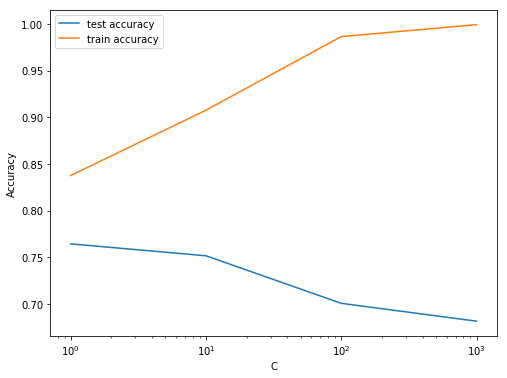

In [7]:


# plot C versus train and test scores (code already written)
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')
plt.show()
# plt.savefig('/code/output/hyperparam_c.png') 


In [8]:

# best hyperparameter C and best (test) accuracy
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']
print(best_score)
print(best_C)



0.7643312101910829
1


In [9]:
#  choose the best value of C 
C = best_C

# build a model with best value of C
linear_model = SVC(C=best_C)
linear_model.fit(x_train, y_train)


# make predictions
print(diabetes_test.head())
predictions = linear_model.predict(diabetes_test.iloc[:, :7])
predictions[:5]

# YOUR CODE ENDS HERE

# write columns id, predictions into the output file
d = pd.DataFrame({'id': diabetes_test['id'], 'Diabetes_Predicted': predictions})
print("\n", "d", "\n", d.head())

# # write the output
# d.to_csv('/code/output/diabetes_predictions.csv', sep=",")


   No_Times_Pregnant  Plasma_Glucose  Diastolic_BP   Triceps   Insulin  \
0           0.529042       -1.186864     -0.213128 -0.108916 -0.715709   
1           1.774596        0.724948      1.387373  0.461620  0.075259   
2          -0.716511        1.599844     -0.213128  1.887960  3.558885   
3           0.217654        0.076876     -0.053078 -1.059810 -0.286567   
4          -0.716511       -0.895232     -0.373178 -1.535257 -0.993390   

        BMI       Age   id  
0 -0.410695 -0.672968  234  
1 -0.396466  2.169953  265  
2  1.325303 -0.280841  207  
3 -0.595678  1.385699  253  
4 -1.919021 -0.574936   30  

 d 
    Diabetes_Predicted   id
0                   0  234
1                   1  265
2                   1  207
3                   0  253
4                   0   30


c:\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
